In [5]:
import altair as alt
import janitor
import pandas as pd
import numpy as np

alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

In [6]:
df = pd.read_csv("../data/WHO_life_expectancy_data.csv")
df = janitor.clean_names(df)

In [7]:
df.head()

,country,year,status,life_expectancy_,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles_,...,polio,total_expenditure,diphtheria_,_hiv_aids,gdp,population,_thinness_1_19_years,_thinness_5_9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
country                            2938 non-null object
year                               2938 non-null int64
status                             2938 non-null object
life_expectancy_                   2928 non-null float64
adult_mortality                    2928 non-null float64
infant_deaths                      2938 non-null int64
alcohol                            2744 non-null float64
percentage_expenditure             2938 non-null float64
hepatitis_b                        2385 non-null float64
measles_                           2938 non-null int64
_bmi_                              2904 non-null float64
under_five_deaths_                 2938 non-null int64
polio                              2919 non-null float64
total_expenditure                  2712 non-null float64
diphtheria_                        2919 non-null float64
_hiv_aids                          2938 non-null

## Life Expectancy Over Time

In [20]:
def df_over_time(df, x, y, colour):
    selected_cols = [x] + [y] + [colour]
    print(selected_cols)
    df = (
        df[selected_cols]
            .groupby([x] + [colour])
            .agg(np.mean)
            .reset_index(drop=False)
    )

    return df

df_over_time(df, "year", "life_expectancy_", "status").head()

['year', 'life_expectancy_', 'status']


,year,status,life_expectancy_
0,2000,Developed,76.803125
1,2000,Developing,64.619868
2,2001,Developed,77.128125
3,2001,Developing,65.009934
4,2002,Developed,77.546875


['year', 'life_expectancy_', 'status']


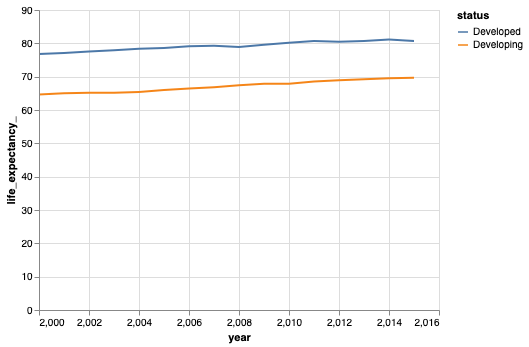

In [22]:
alt.Chart(
    df_over_time(df, "year", "life_expectancy_", "status")
).mark_line(
).encode(
    alt.X("year"),
    alt.Y("life_expectancy_"),
    alt.Color("status")
)